In [208]:
from os import listdir
from os.path import isfile, join

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [209]:
for i in ['cph', 'rsf', 'dcph', 'dcm', 'dsm', 'coxkan']:
    for n in range(10):
        print('python exp/test.py --data whas500 --model {} --seed {}'.format(i, n))

python exp/test.py --data whas500 --model cph --seed 0
python exp/test.py --data whas500 --model cph --seed 1
python exp/test.py --data whas500 --model cph --seed 2
python exp/test.py --data whas500 --model cph --seed 3
python exp/test.py --data whas500 --model cph --seed 4
python exp/test.py --data whas500 --model cph --seed 5
python exp/test.py --data whas500 --model cph --seed 6
python exp/test.py --data whas500 --model cph --seed 7
python exp/test.py --data whas500 --model cph --seed 8
python exp/test.py --data whas500 --model cph --seed 9
python exp/test.py --data whas500 --model rsf --seed 0
python exp/test.py --data whas500 --model rsf --seed 1
python exp/test.py --data whas500 --model rsf --seed 2
python exp/test.py --data whas500 --model rsf --seed 3
python exp/test.py --data whas500 --model rsf --seed 4
python exp/test.py --data whas500 --model rsf --seed 5
python exp/test.py --data whas500 --model rsf --seed 6
python exp/test.py --data whas500 --model rsf --seed 7
python exp

In [210]:
for i in ['cph', 'rsf', 'dcph', 'dcm', 'dsm', 'coxkan']:
    for n in range(10):
        print('python exp/test.py --data flchain --model {} --seed {}'.format(i, n))

python exp/test.py --data flchain --model cph --seed 0
python exp/test.py --data flchain --model cph --seed 1
python exp/test.py --data flchain --model cph --seed 2
python exp/test.py --data flchain --model cph --seed 3
python exp/test.py --data flchain --model cph --seed 4
python exp/test.py --data flchain --model cph --seed 5
python exp/test.py --data flchain --model cph --seed 6
python exp/test.py --data flchain --model cph --seed 7
python exp/test.py --data flchain --model cph --seed 8
python exp/test.py --data flchain --model cph --seed 9
python exp/test.py --data flchain --model rsf --seed 0
python exp/test.py --data flchain --model rsf --seed 1
python exp/test.py --data flchain --model rsf --seed 2
python exp/test.py --data flchain --model rsf --seed 3
python exp/test.py --data flchain --model rsf --seed 4
python exp/test.py --data flchain --model rsf --seed 5
python exp/test.py --data flchain --model rsf --seed 6
python exp/test.py --data flchain --model rsf --seed 7
python exp

In [211]:
res_files = [f for f in listdir('../results/') if isfile(join('../results/', f))]

In [212]:
df_summary = pd.DataFrame()

for i in res_files:
    if i.split('.')[-1] != 'txt':
        continue
    res = pd.read_csv('../results/{}'.format(i), sep=":\t", header=None, engine='python')
    res.columns = ["info", "value"]
    res = res.set_index('info')
    
    res_25 = res.transpose()[list(res.transpose().columns[:3]) + list(res.transpose().columns[4:7])]
    res_25.columns = list(res.transpose().columns[:3]) + ['C-Index', 'Brier Score', 'ROC AUC']
    res_25['Quantile'] = 0.25
    
    res_5 = res.transpose()[list(res.transpose().columns[:3]) + list(res.transpose().columns[8:11])]
    res_5.columns = list(res.transpose().columns[:3]) + ['C-Index', 'Brier Score', 'ROC AUC']
    res_5['Quantile'] = 0.5
    
    res_75 = res.transpose()[list(res.transpose().columns[:3]) + list(res.transpose().columns[12:])]
    res_75.columns = list(res.transpose().columns[:3]) + ['C-Index', 'Brier Score', 'ROC AUC']
    res_75['Quantile'] = 0.75
    
    df_summary = pd.concat([df_summary, res_25, res_5, res_75])
    
    # df_summary = pd.concat([df_summary, res.transpose()])

df_summary.reset_index(inplace=True, drop=True)
df_summary

,model,data,seed,C-Index,Brier Score,ROC AUC,Quantile
0,dcm,whas500,3,0.7377358490566037,0.05998052002573588,0.7461240310077519,0.25
1,dcm,whas500,3,0.7318104906937394,0.11928071298272065,0.7564102564102564,0.50
2,dcm,whas500,3,0.7802790260202541,0.16026910389987484,0.8394787764970022,0.75
3,cph,whas500,6,0.7010428736964078,0.09693530800584262,0.7158536585365853,0.25
4,cph,whas500,6,0.6928020565552699,0.16210003154267927,0.718817591925018,0.50
...,...,...,...,...,...,...,...
166,dcph,whas500,1,0.7516185991759858,0.14449904422652482,0.7686116700201205,0.50
167,dcph,whas500,1,0.7729834527962766,0.18155712534036966,0.8159274593888571,0.75
168,dcph,whas500,0,0.737012987012987,0.06777535673121689,0.7411764705882353,0.25
169,dcph,whas500,0,0.7508417508417509,0.13869899056655882,0.7710210210210211,0.50


In [213]:
for i in df_summary.columns[3:]:
    df_summary[i] = df_summary[i].astype('float')
df_summary

,model,data,seed,C-Index,Brier Score,ROC AUC,Quantile
0,dcm,whas500,3,0.737736,0.059981,0.746124,0.25
1,dcm,whas500,3,0.731810,0.119281,0.756410,0.50
2,dcm,whas500,3,0.780279,0.160269,0.839479,0.75
3,cph,whas500,6,0.701043,0.096935,0.715854,0.25
4,cph,whas500,6,0.692802,0.162100,0.718818,0.50
...,...,...,...,...,...,...,...
166,dcph,whas500,1,0.751619,0.144499,0.768612,0.50
167,dcph,whas500,1,0.772983,0.181557,0.815927,0.75
168,dcph,whas500,0,0.737013,0.067775,0.741176,0.25
169,dcph,whas500,0,0.750842,0.138699,0.771021,0.50


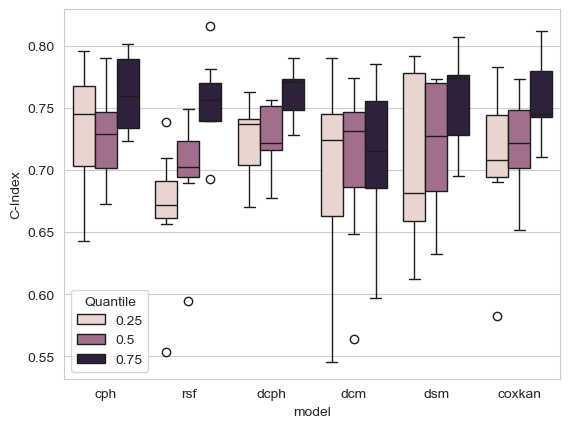

In [214]:
sns.boxplot(df_summary.loc[df_summary.data=='whas500'], x='model', y='C-Index', hue='Quantile', 
            order=['cph', 'rsf', 'dcph', 'dcm', 'dsm', 'coxkan'])
plt.show()

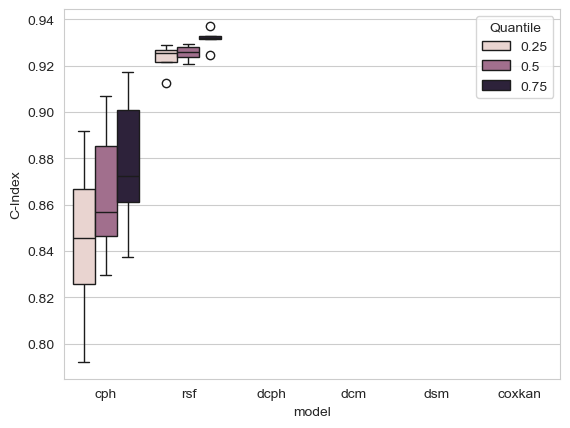

In [215]:
sns.boxplot(df_summary.loc[df_summary.data=='flchain'], x='model', y='C-Index', hue='Quantile', 
            order=['cph', 'rsf', 'dcph', 'dcm', 'dsm', 'coxkan'])
plt.show()